<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   Sex       39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39044 non-null  float64
 4   kilo      38292 non-null  float64
 5   takım     39783 non-null  object 
 6   NOC       39783 non-null  object 
 7   yıl       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.9+ MB


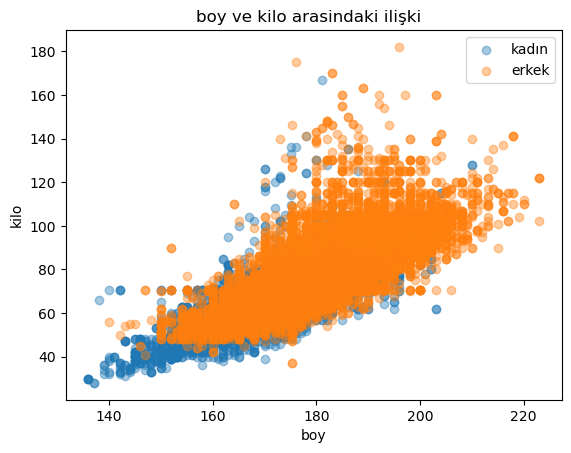

Series([], Name: spor, dtype: int64)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
 

import warnings 
warnings.filterwarnings("ignore")
veri = pd.read_csv("olimpiyatlar_temizlenmis.csv")
veri.info()
import matplotlib.pyplot as plt


erkek = veri[veri['Sex'] == "M"]
erkek.head(3)     # kadın ve erkek değişkenlerini belirleyip kilo ve boy değerleri 
kadin =veri[veri['Sex']=="F"] # arasdında saçılım grafiği oluşturuldu 
kadin.head(3)
plt.figure()
plt.scatter(kadin.boy,kadin.kilo,alpha=0.4,label="kadın")
plt.scatter(erkek.boy,erkek.kilo,alpha=0.4,label="erkek")
plt.xlabel("boy")
plt.ylabel("kilo")
plt.title("boy ve kilo arasindaki ilişki  ")
plt.legend()
plt.show()
veri.loc[:,["yas","boy","kilo"]].corr() # kolerasyon tablosu
#sporcuları altın gümüş ve bronz madalyaya göre ayarlıyalım 
veri_gecici = veri.copy()
veri_gecici=pd.get_dummies(veri_gecici,columns=['madalya'])
veri_gecici.head(2) 
#takımların kazandıkları madalyalar
veri_gecici[["takım","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takım"] ,as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]
#veri_pivot=veri.pivot_table(index="madalya ",columns="cinsiyet",
#                            values["boy","kilo","yas"],
#                            aggfunc={"boy":np.mean,"kilo":np.mean,"yas":[min,max,np.std]})
#veri_pivot.head()
# anomoli değer yani aykırı değer 
def anomaliTesbiti(df,ozellik):
    outlier_indices=[]
    
    for c in ozellik:
        # 1. çeyrek
        Q1 = np.percentile(df[c],25)
        # 3. çeyrek
        Q3 = np.percentile(df[c],75)
        #IQR= Inter Quartile Range 
        IQR = Q3-Q1
        # aykırı değer için ek adım miktarı 
        outlier_step=1.5*IQR
        # aykırı değeri ve bulunduğu indeksi tesbit edelim 
        outlier_list_col=df[(df[c]<Q1-outlier_step) |(df[c]>Q3+ outlier_step)].index
        # tesbit edilen indexleri depola
        outlier_indices.extend(outlier_list_col)
        #eşsiz aykırı  değerleri bulalım 
        outlier_indices=Counter(outlier_indices)
        #eğer bir örnek v adet sutununda farklı değer ise bunu aykırı kabul edelim 
        multiple_outliers=list(i for i,v in outlier_indices.items()if v >1)
        return multiple_outliers
veri_anomali=veri.loc[anomaliTesbiti(veri,["yas","kilo","boy"])]
veri_anomali.spor.value_counts()